In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization,Activation,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

In [ ]:
from google.colab.patches import cv2_imshow
def contour_crop(image,plot=False):
    grayscale=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #show(grayscale)
    #cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    #grayscale=cv2.GaussianBlur(grayscale,(5,5),0)
    #cv2_imshow(grayscale.copy())
    threshold_image=cv2.threshold(grayscale,45,255,cv2.THRESH_BINARY)[1]
    #plt.imshow(threshold_image)
    threshold_image=cv2.erode(threshold_image, None, iterations=2)
    #plt.imshow(threshold_image)
    threshold_image=cv2.dilate(threshold_image, None, iterations=2)
    #print(plt.imshow(threshold_image))

    contour=cv2.findContours(threshold_image.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour=imutils.grab_contours(contour)
    c=max(contour, key=cv2.contourArea)

    extreme_pnts_left=tuple(c[c[:,:, 0].argmin()][0])
    extreme_pnts_right=tuple(c[c[:,:, 0].argmax()][0])
    extreme_pnts_top=tuple(c[c[:,:, 1].argmin()][0])
    extreme_pnts_bot=tuple(c[c[:,:, 1].argmax()][0])

    new_image=image[extreme_pnts_top[1]:extreme_pnts_bot[1],extreme_pnts_left[0]:extreme_pnts_right[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis= 'both', which='both',
                        top=False,bottom=False,left=False,right=False, labelbottom=False,labeltop=False,labelleft=False,labelright=False)
        plt.title('original image')
        plt.subplot(1,2,2)
        plt.imshow(new_image)

        plt.tick_params(axis= 'both', which='both',
                        top=False,bottom=False,left=False,right=False, labelbottom=False,labeltop=False,labelleft=False,labelright=False)
        plt.title('Cropped image')
        plt.subplot(1,2,2)
        plt.show()
        return new_image





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


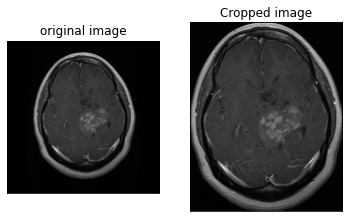

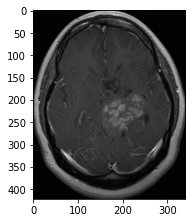

In [ ]:
e_image=cv2.imread('/content/drive/MyDrive/Colab Notebooks (1)/dataset/yes/Y104.jpg',1)
nimage = contour_crop(e_image, True)
plt.subplot(1, 2, 1)
plt.imshow(nimage)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')